# Heatmap EDA

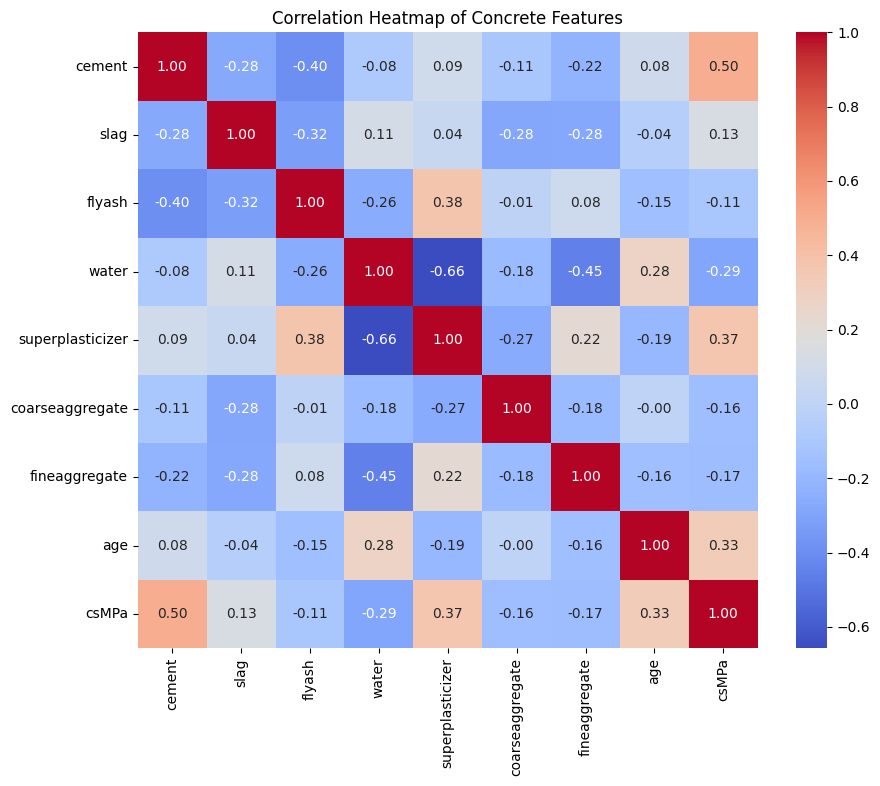

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# get dataset
df = pd.read_csv("Concrete_Data_Yeh.csv")

# calculate correlation matrix
correlation_matrix = df.corr()

# heatmap plot
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap of Concrete Features")
plt.show()


# Distribution Plots (Histograms)

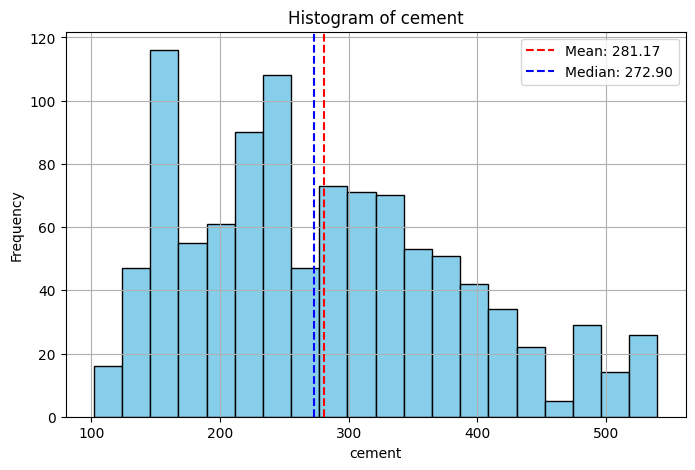

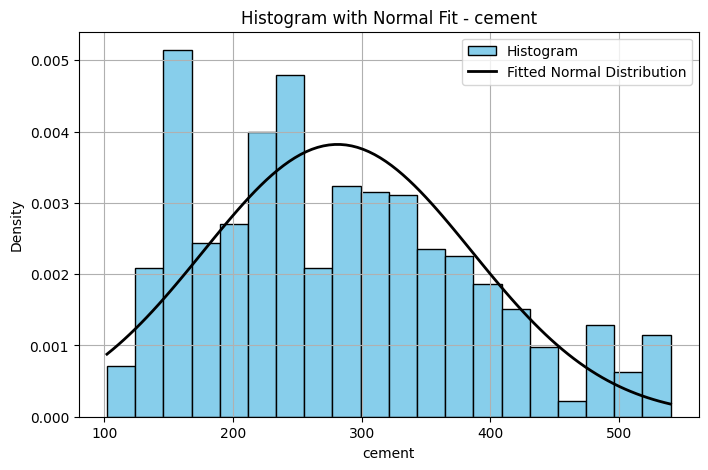

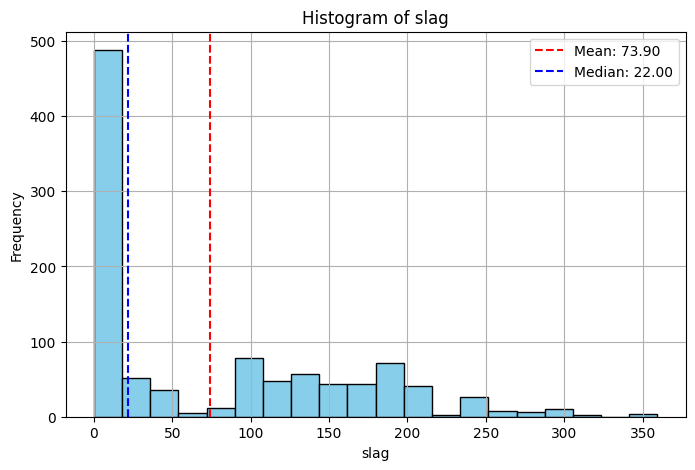

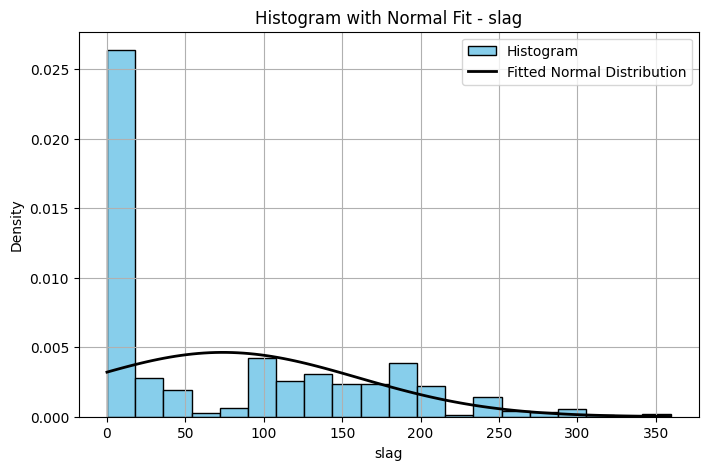

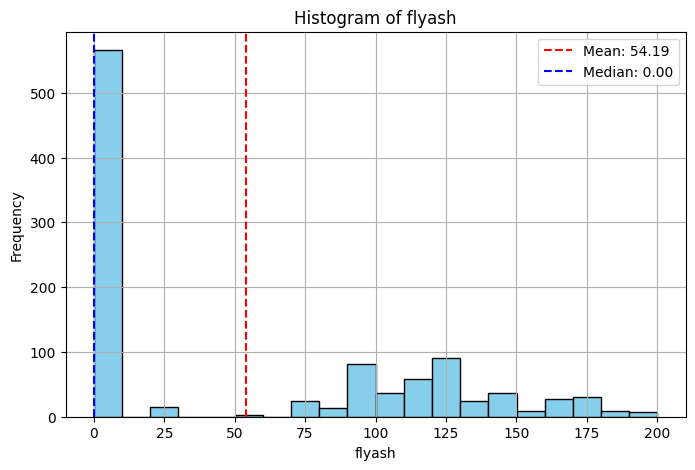

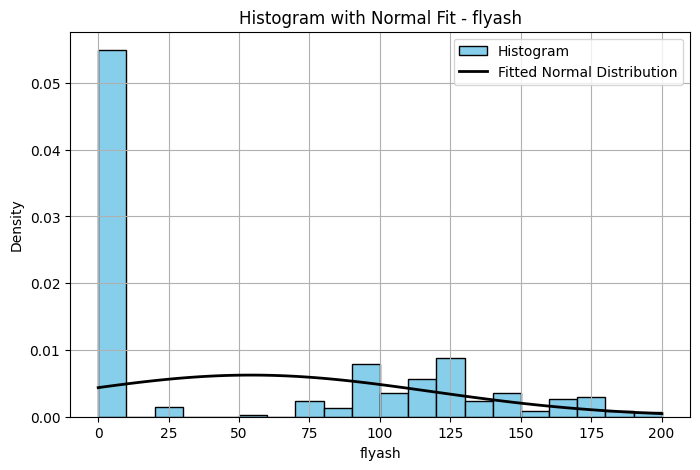

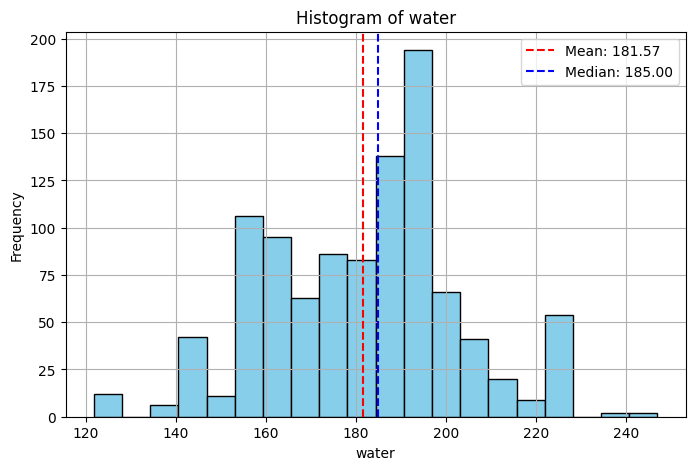

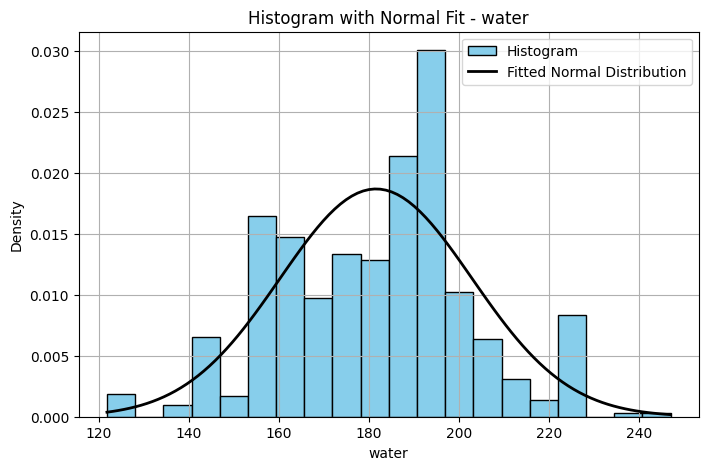

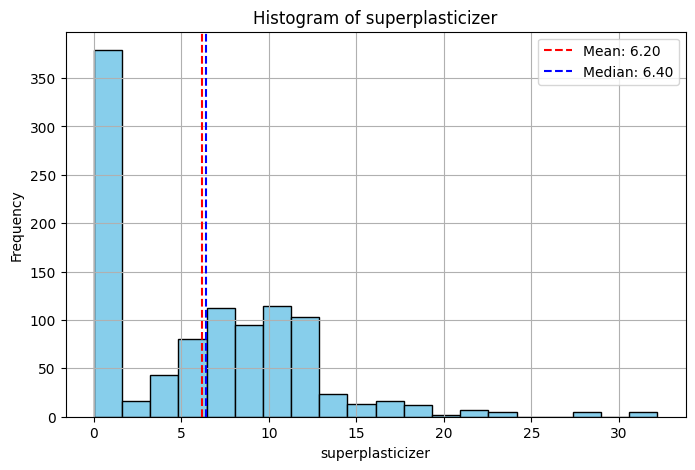

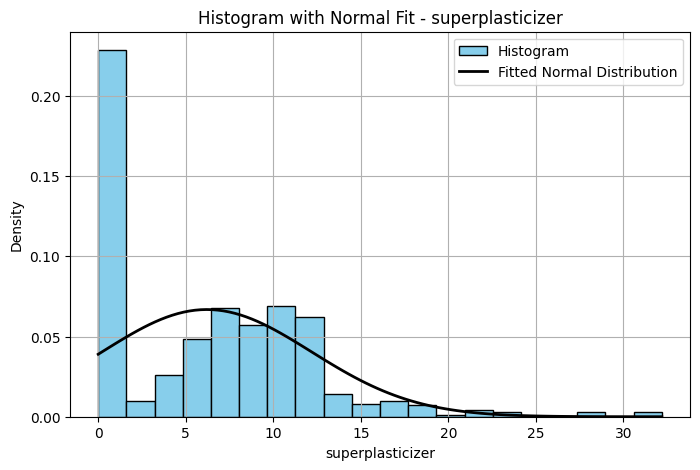

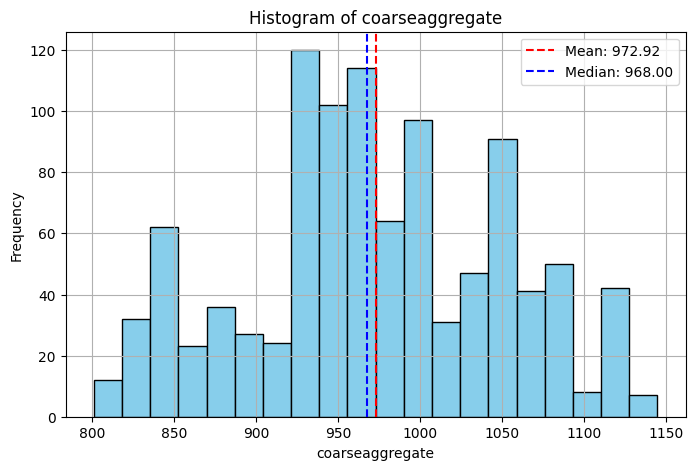

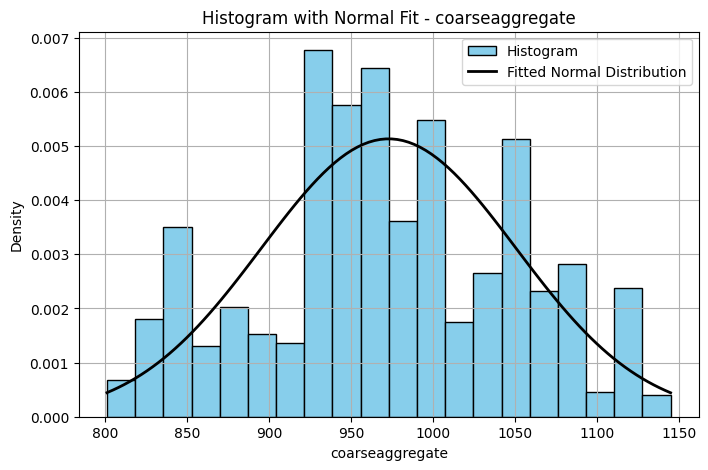

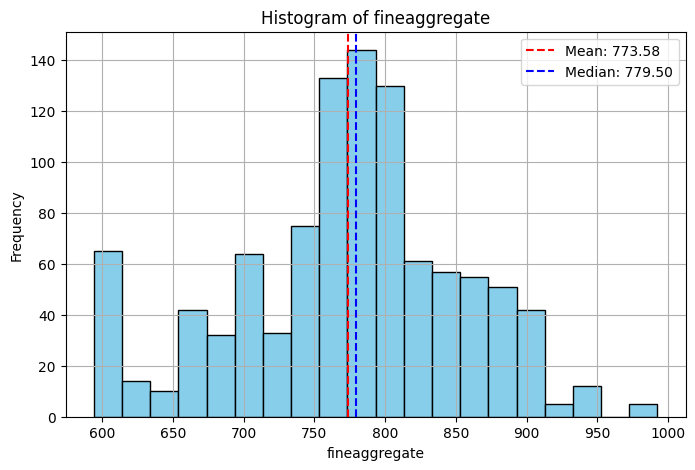

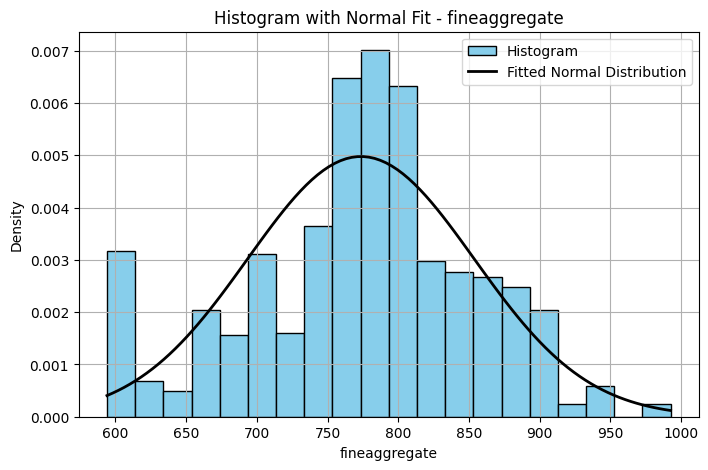

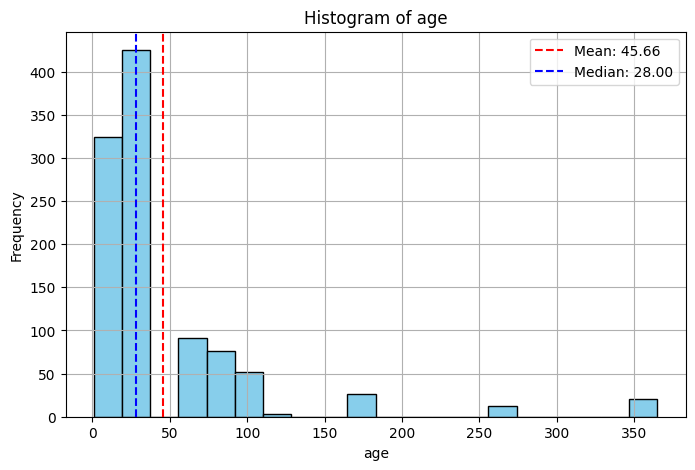

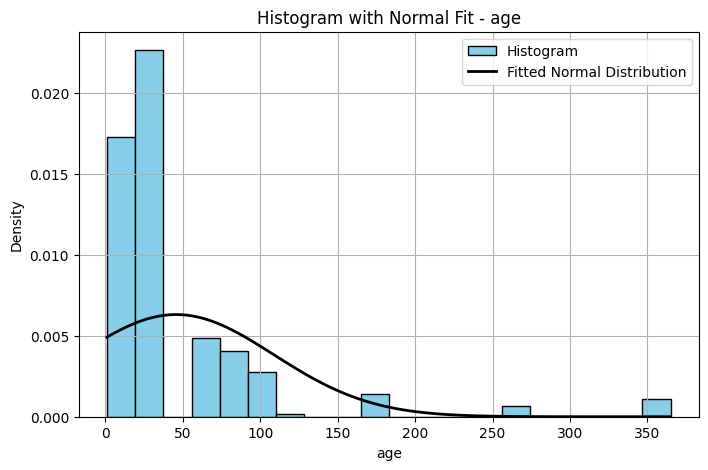

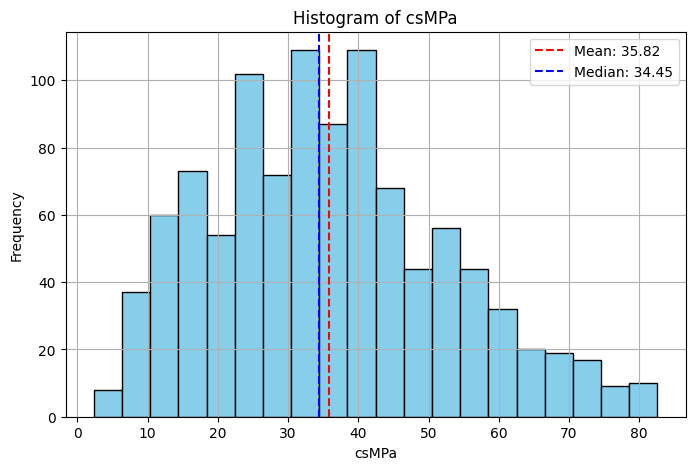

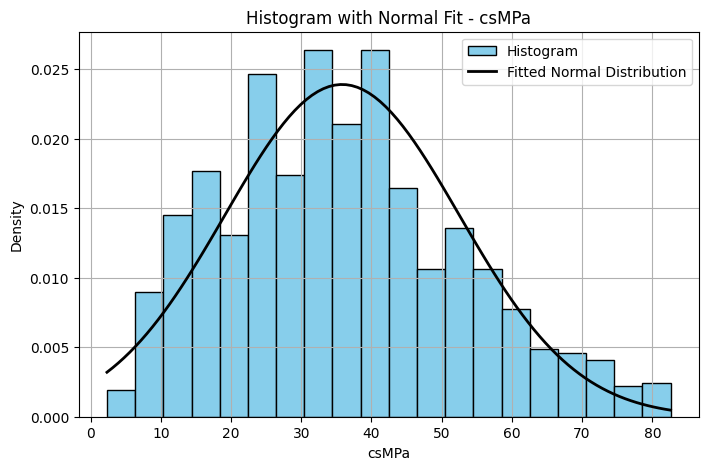

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm
import os

# Load dataset
df = pd.read_csv("Concrete_Data_Yeh.csv")

# Output directory
output_dir = "EDA outputs"

# Loop through each column to generate 2 plots per feature
for col in df.columns:
    data = df[col]

    # Plot histogram of y values
    plt.figure(figsize=(8, 5))
    plt.hist(data, bins=20, color='skyblue', edgecolor='black')
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.title(f"Histogram of {col}")

    # Calculate and plot the mean and median of data
    mean_val = data.mean()
    median_val = data.median()
    plt.axvline(mean_val, color='red', linestyle='--', linewidth=1.5, label=f"Mean: {mean_val:.2f}")
    plt.axvline(median_val, color='blue', linestyle='--', linewidth=1.5, label=f"Median: {median_val:.2f}")
    plt.legend()
    plt.grid(True)
    plt.savefig(f"{output_dir}/Histogram with Mean & Median of {col}.png")
    plt.show()

    # Plot histogram with fitted normal distribution
    plt.figure(figsize=(8, 5))
    plt.hist(data, bins=20, color='skyblue', edgecolor='black', density=True, label='Histogram')

    # Fit a normal distribution to the data
    mu, std_dev = norm.fit(data)
    x = np.linspace(data.min(), data.max(), 100)
    p = norm.pdf(x, mu, std_dev)
    plt.plot(x, p, 'k', linewidth=2, label='Fitted Normal Distribution')

    # label
    plt.title(f"Histogram with Normal Fit - {col}")
    plt.xlabel(col)
    plt.ylabel("Density")

    plt.legend()
    plt.grid(True)
    plt.savefig(f"{output_dir}/Histogram with Normal Fit of {col}.png")
    plt.show()


# Boxplots (Outlier Detection & Spread)

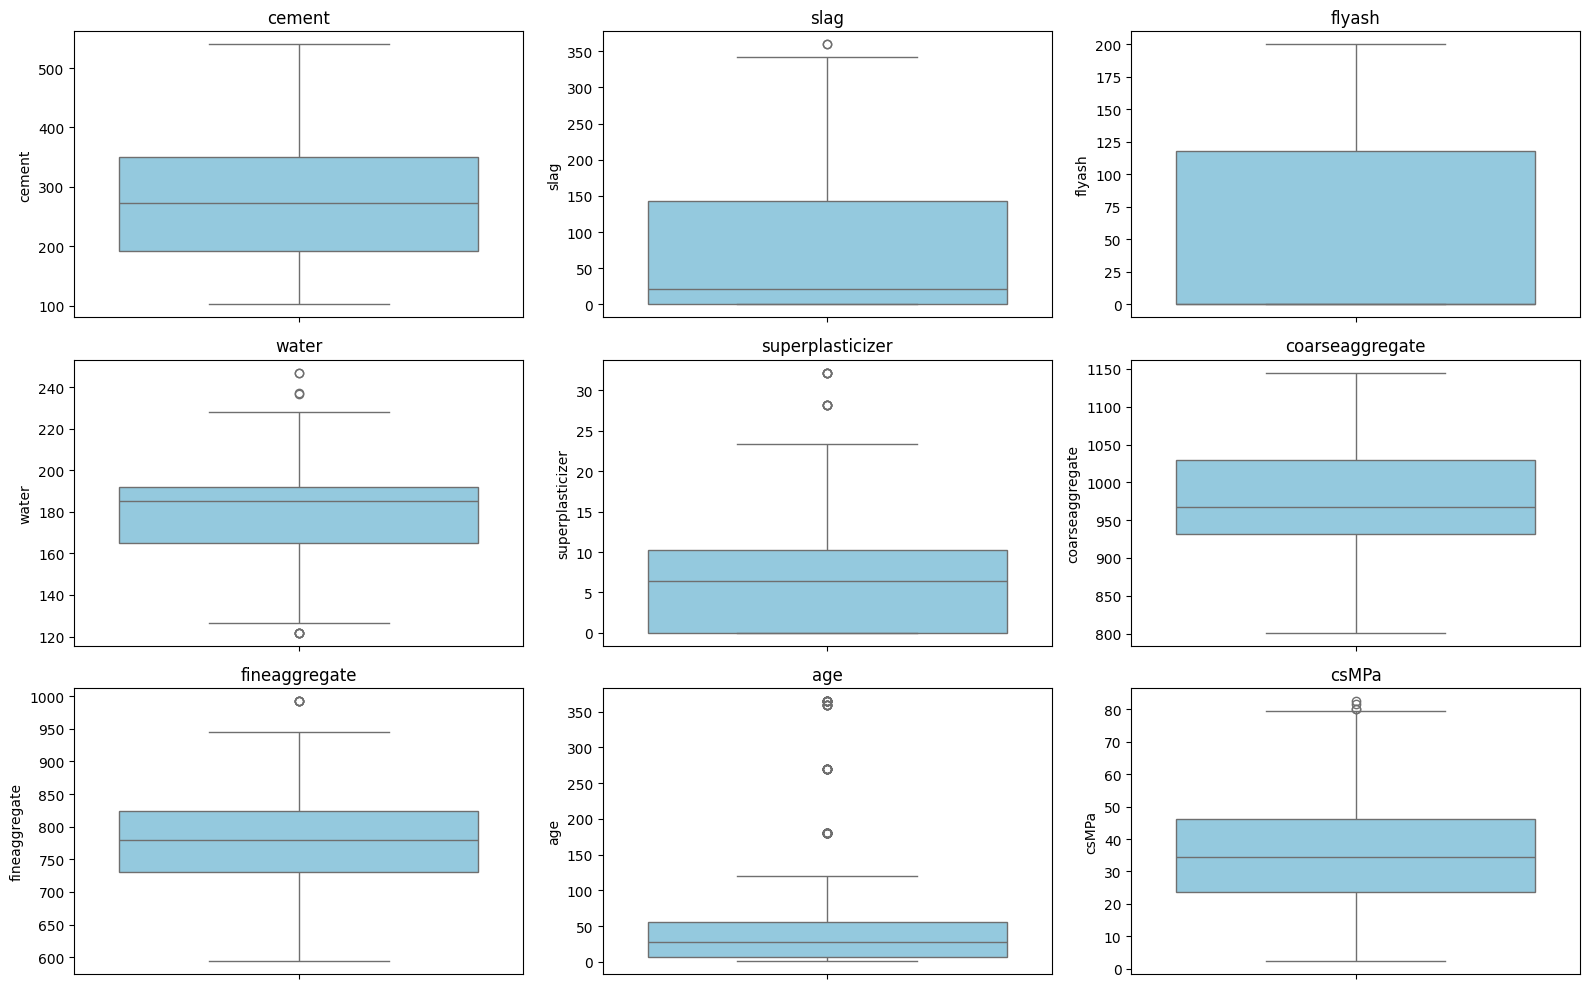


Summary statistics:
            cement         slag       flyash        water  superplasticizer  \
count  1030.000000  1030.000000  1030.000000  1030.000000       1030.000000   
mean    281.167864    73.895825    54.188350   181.567282          6.204660   
std     104.506364    86.279342    63.997004    21.354219          5.973841   
min     102.000000     0.000000     0.000000   121.800000          0.000000   
25%     192.375000     0.000000     0.000000   164.900000          0.000000   
50%     272.900000    22.000000     0.000000   185.000000          6.400000   
75%     350.000000   142.950000   118.300000   192.000000         10.200000   
max     540.000000   359.400000   200.100000   247.000000         32.200000   

       coarseaggregate  fineaggregate          age        csMPa  
count      1030.000000    1030.000000  1030.000000  1030.000000  
mean        972.918932     773.580485    45.662136    35.817961  
std          77.753954      80.175980    63.169912    16.705742  
min

In [17]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

# Load the concrete dataset
df = pd.read_csv("Concrete_Data_Yeh.csv")

# Use all features
features_to_plot = df.columns.tolist()

# Get output directory
output_dir = "EDA outputs"

# Boxplots for all features (3 rows x 3 columns)
plt.figure(figsize=(16, 10))
for i, feature in enumerate(features_to_plot, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(y=df[feature], color='skyblue')
    plt.title(feature)

plt.tight_layout()
plt.savefig(f"{output_dir}/Boxplots For All Features.png")
plt.show()

# Summary statistics
print("\nSummary statistics:")
print(df.describe())
print("\n")

# Outlier detection for all features
for feature in features_to_plot:
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # count outliers
    outliers = df[(df[feature] < lower_bound) | (df[feature] > upper_bound)][feature]
    num_outliers = len(outliers)

    print(f"{feature}: {num_outliers} outliers")





# Histogram with Subgrids

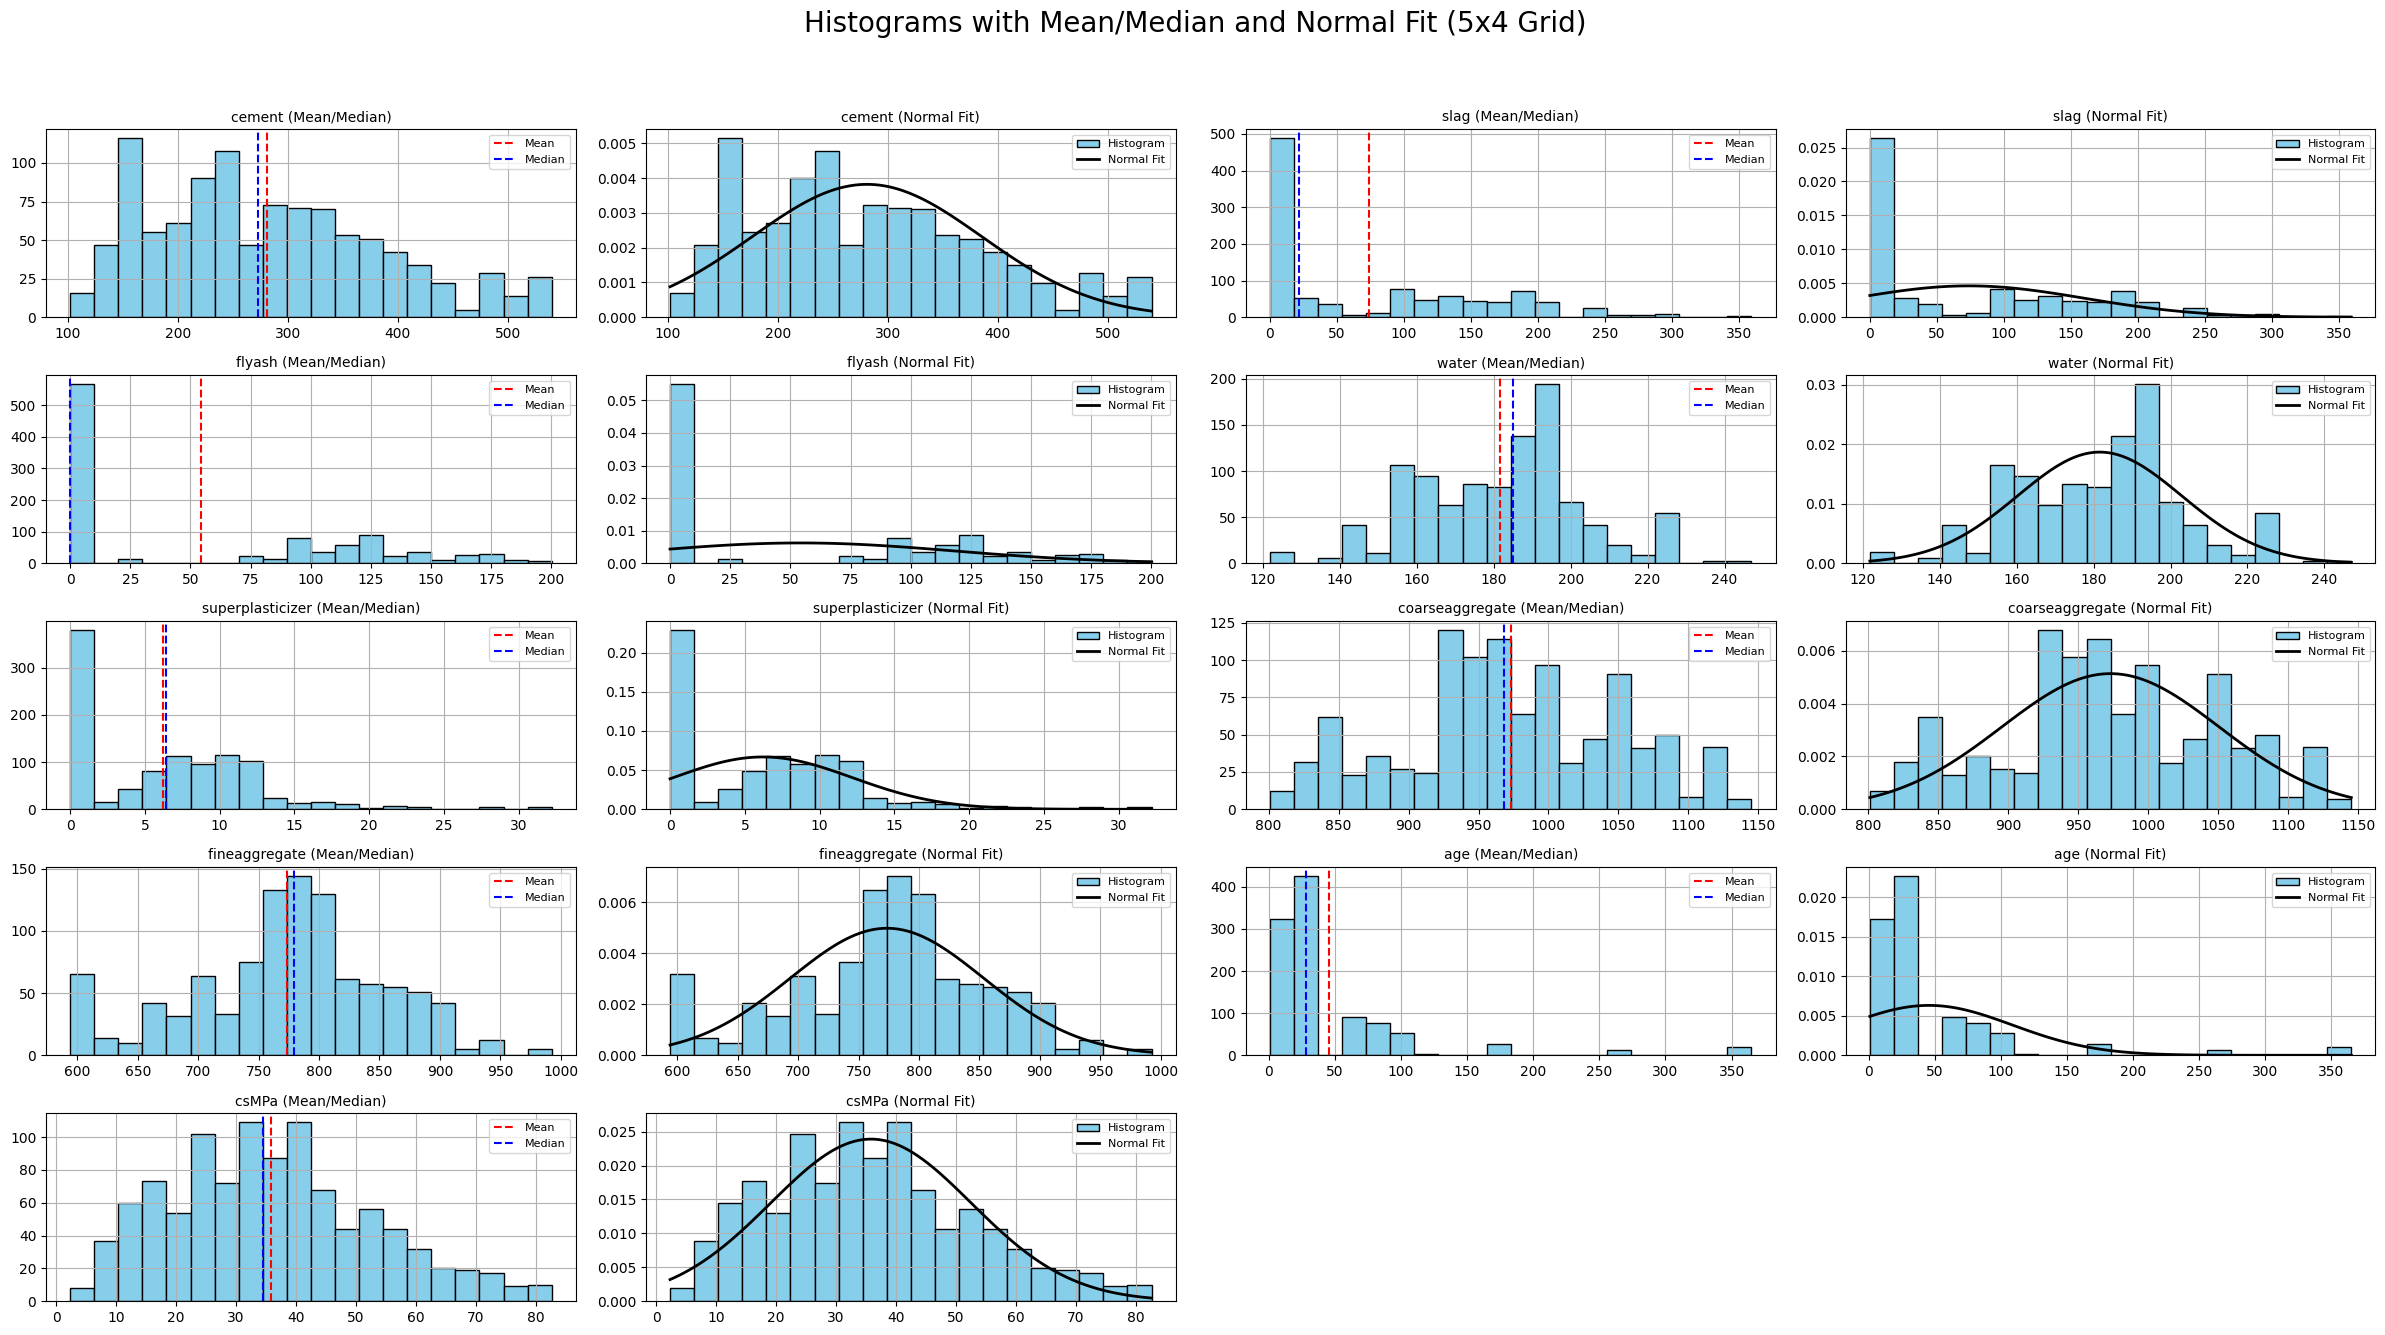

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm
import os

# Load dataset
df = pd.read_csv("Concrete_Data_Yeh.csv")

# Output directory
output_dir = "EDA outputs"
os.makedirs(output_dir, exist_ok=True)

features = df.columns.tolist()

# two plots per feature
num_plots = len(features) * 2  
rows = 5
cols = 4

fig, axes = plt.subplots(rows, cols, figsize=(24, 14))
fig.suptitle("Histograms with Mean/Median and Normal Fit", fontsize=20)

# flatten to 1D array for easy indexing
axes = axes.flatten() 

for i, feature in enumerate(features):
    data = df[feature]
    
    # First plot: histogram with mean & median
    ax1 = axes[i * 2]
    ax1.hist(data, bins=20, color='skyblue', edgecolor='black')
    mean_val = data.mean()
    median_val = data.median()
    ax1.axvline(mean_val, color='red', linestyle='--', linewidth=1.5, label='Mean')
    ax1.axvline(median_val, color='blue', linestyle='--', linewidth=1.5, label='Median')
    ax1.set_title(f"{feature} (Mean/Median)", fontsize=10)
    ax1.legend(fontsize=8)
    ax1.grid(True)

    # Second plot: histogram with normal fit
    ax2 = axes[i * 2 + 1]
    ax2.hist(data, bins=20, color='skyblue', edgecolor='black', density=True, label='Histogram')
    mu, std_dev = norm.fit(data)
    x = np.linspace(data.min(), data.max(), 100)
    p = norm.pdf(x, mu, std_dev)
    ax2.plot(x, p, 'k', linewidth=2, label='Normal Fit')
    ax2.set_title(f"{feature} (Normal Fit)", fontsize=10)
    ax2.legend(fontsize=8)
    ax2.grid(True)

# Hide unused axes
for j in range(len(features) * 2, rows * cols):
    # remove empty subplot
    fig.delaxes(axes[j])  

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.savefig(f"{output_dir}/Concrete Histograms 5x4.png")
plt.show()
